# Predicting Stock Price with 99% Accuracy

In [25]:
#import necessary library and load the file
import pandas as pd
import numpy as np

filename = 'prices.csv'

df = pd.read_csv(filename)
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [26]:
#setting index as date
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')

df.index = df['date']

In [27]:
df.head()

,date,symbol,open,close,low,high,volume
date,,,,,,,
2016-01-05,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


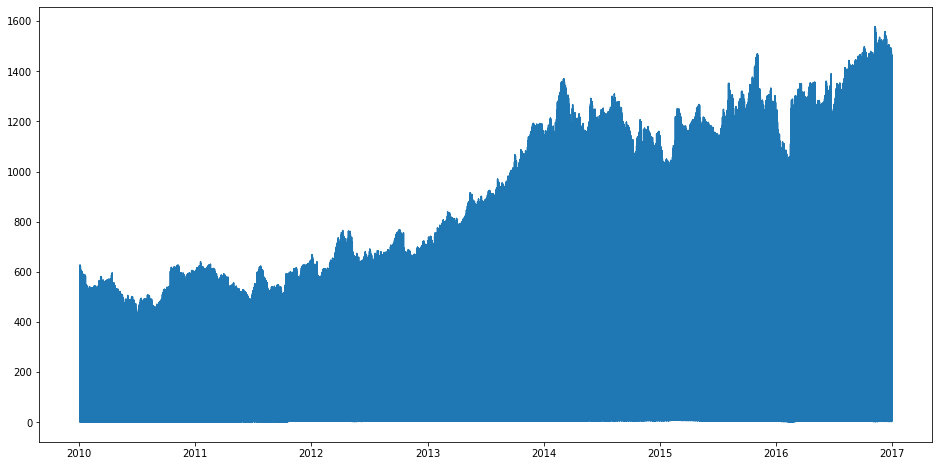

In [28]:
#visualize close price from 2010-2017
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(df['close'], label = 'Close Price History')

In 7 years there were increased in close price for all of the companies listed in NYSE

<AxesSubplot:xlabel='open', ylabel='close'>

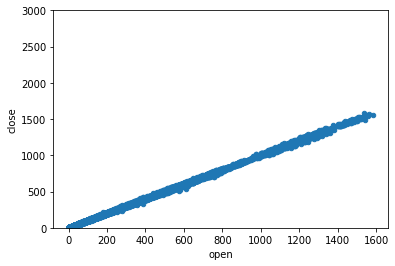

In [29]:
#Closed price compare with open price

var1 = 'open'

data = pd.concat([df['close'],df[var1]],axis=1)
data.plot.scatter(x=var1,y='close',ylim=(0,3000))

Based on the graph above, there are positive correlations between open and close price

<AxesSubplot:xlabel='low'>

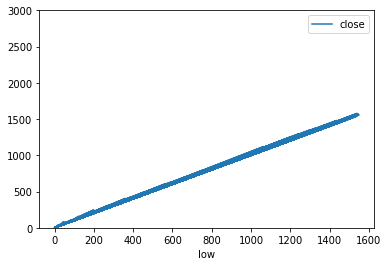

In [30]:
#Closed price compare with low and high 

var2 = 'low'

data = pd.concat([df['close'],df[var2]],axis=1)
data.plot.line(x=var2, y='close',ylim=(0,3000))

<AxesSubplot:xlabel='high', ylabel='close'>

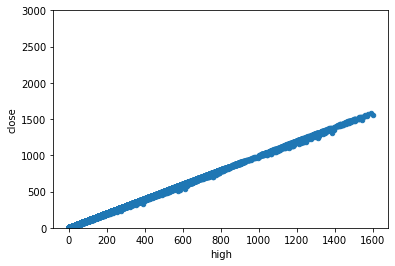

In [31]:
var3 = 'high'

data = pd.concat([df['close'],df[var3]],axis=1)
data.plot.scatter(x=var3,y='close',ylim=(0,3000))

In [32]:
cdf = df[['high','low','close']]
cdf.head()

,high,low,close
date,,,
2016-01-05,126.250000,122.309998,125.839996
2016-01-06,125.540001,119.940002,119.980003
2016-01-07,119.739998,114.930000,114.949997
2016-01-08,117.440002,113.500000,116.620003
2016-01-11,117.330002,114.089996,114.970001


In [33]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Train Model and Predict

For attributes high, low, and open show positive correlations with close price

In [34]:
#Create the Machine Learning Model

from sklearn.linear_model import LinearRegression
#turn data into array
#train model for Multiple Regression
lr = LinearRegression()
x = np.asanyarray(train[['high','low']])
y = np.asanyarray(train[['close']])
lr.fit(x,y)

LinearRegression()

In [35]:
#Predict using test data
yhat = lr.predict(test[['high','low']])
xtest = np.asanyarray(test[['high','low']])
ytest = np.asanyarray(test[['close']])

print("Residual sum of squares: %.2f"
      % np.mean((yhat - ytest) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(xtest, ytest))

Residual sum of squares: 0.66
Variance score: 1.00


# Using other measurement for Accuracy of the Model

In [36]:
from sklearn.metrics import r2_score
acc = r2_score(ytest, yhat)
acc

0.9999047705255902